### What Are Embeddings?
Think of embeddings as a way to translate words into a language that computers understand - numbers!

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

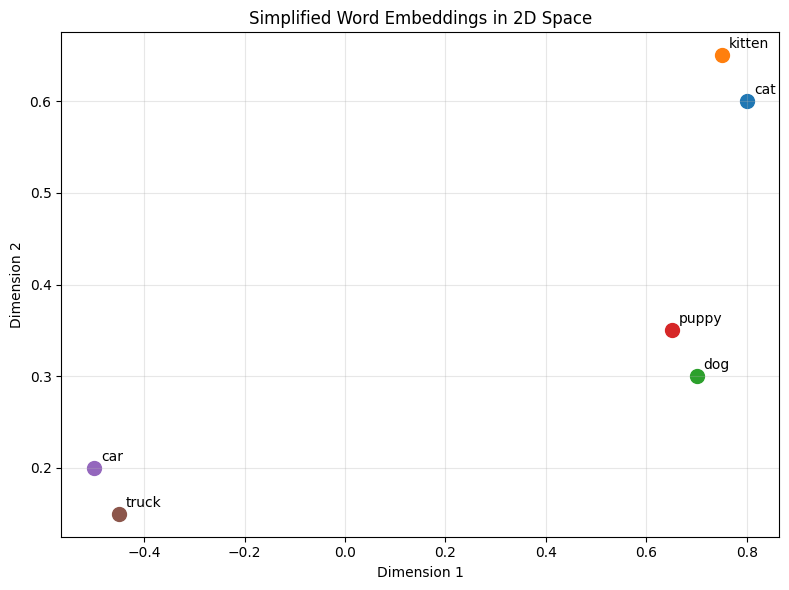

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Measuring Similarity

In [5]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product=np.dot(vec1,vec2)
    norm_a=np.linalg.norm(vec1)
    norm_b=np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)



In [6]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_similarity=cosine_similarity(cat_vector,kitten_vector)
print(cat_kitten_similarity)

0.9966186334192181


In [7]:
cosine_similarity(cat_vector,car_vector)

-0.43718588548916804

### Creating Your First Embeddings

In [8]:
### Huggingface And OpenAI Models

from langchain_huggingface import HuggingFaceEmbeddings

## Initialize a simple Embedding model(no API Key needed!)
embeddings=HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
embeddings




/Users/huzi/Desktop/RAG/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [9]:
## create your first embeddings
text="Hello, I am learning about embeddings!"

embedding=embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding length : {len(embedding)}")
print(embedding)


Text: Hello, I am learning about embeddings!
Embedding length : 384
[-0.018163252621889114, -0.09955167025327682, 0.013816086575388908, -0.008125927299261093, 0.014152232557535172, 0.0640648752450943, -0.00625333609059453, -0.00301788910292089, 0.025287220254540443, -0.020198648795485497, 0.024329721927642822, 0.07435055077075958, 0.05117718502879143, 0.02203845977783203, -0.05830620974302292, 0.015268278308212757, 0.023584363982081413, 0.09455399960279465, -0.06508845090866089, 0.013296680524945259, -0.020497556775808334, -0.05690851807594299, 0.030303290113806725, -0.08365610241889954, 0.02659635804593563, -0.015231461264193058, -0.043615419417619705, 0.05398396775126457, 0.09025713056325912, -0.08893880993127823, 0.03964459151029587, -0.008834997192025185, -0.030343763530254364, 0.07425563037395477, -0.054099176079034805, 0.11108000576496124, 0.0368998646736145, -0.008959809318184853, -0.06140237674117088, -0.0031433335971087217, 0.02195821702480316, 0.04220821335911751, -0.02893790

In [10]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentence=embeddings.embed_documents(sentences)

print(embedding_sentence[0])
print(embedding_sentence[1])

[0.1304018348455429, -0.011870165355503559, -0.02811700664460659, 0.05123857408761978, -0.05597447603940964, 0.030191559344530106, 0.03016134351491928, 0.024698331952095032, -0.018370594829320908, 0.05876680463552475, -0.024953214451670647, 0.060154225677251816, 0.039831697940826416, 0.03323056921362877, -0.061311401426792145, -0.0493730828166008, -0.05486350879073143, -0.0400761142373085, 0.05642914026975632, 0.03915659710764885, -0.03473709151148796, -0.01324771810323, 0.03196616843342781, -0.06349924951791763, -0.060178566724061966, 0.07823449373245239, -0.028303850442171097, -0.047442831099033356, 0.04035930708050728, -0.006630914751440287, -0.06674094498157501, -0.004191357642412186, -0.025311686098575592, 0.053341664373874664, 0.017428118735551834, -0.09792359918355942, 0.006061260588467121, -0.06524165719747543, 0.04557254537940025, 0.02364182285964489, 0.07658479362726212, -0.010264301672577858, -0.004076823592185974, -0.06232284754514694, 0.03370527923107147, 0.018661092966794

In [11]:
from langchain_huggingface import HuggingFaceEmbeddings
import time

# Popular models comparison
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications

